In [1]:
import pandas as pd
data = pd.read_csv("student_scores.csv")
print(data.head(10))

     name  hours  score gender grades class
0   Aarav      8     76      M      A    9A
1    Riya      5     62      F      B    9B
2   Kabir     10     88      M      A   10A
3    Sana      4     55      F      C    9A
4  Vivaan      7     72      M      B   10B
5  Ishita      6     64      F      B    9C
6   Rohan      3     48      M      D    9B
7   Meera      9     90      F      A   11A
8  Aditya      2     38      M      F    9C
9   Kavya     11     93      F      A   12A


In [2]:
print('columns:',data.columns.tolist())
print('\nData set info:')
print(data.info())

print('\nDataset completness')
print(data.isnull().sum())
print('\nDataset Consistency:')
print(data.dtypes)



columns: ['name', 'hours', 'score', 'gender', 'grades', 'class']

Data set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    92 non-null     object
 1   hours   92 non-null     int64 
 2   score   92 non-null     int64 
 3   gender  92 non-null     object
 4   grades  92 non-null     object
 5   class   92 non-null     object
dtypes: int64(2), object(4)
memory usage: 4.4+ KB
None

Dataset completness
name      0
hours     0
score     0
gender    0
grades    0
class     0
dtype: int64

Dataset Consistency:
name      object
hours      int64
score      int64
gender    object
grades    object
class     object
dtype: object


In [3]:
print('\nDataset describe:')
data.describe()

print('\nDataset bias')
print(data['gender'].value_counts(normalize=True))
print(data['grades'].value_counts(normalize=True))
data['class'].value_counts(normalize=True)


Dataset describe:

Dataset bias
gender
F    0.51087
M    0.48913
Name: proportion, dtype: float64
grades
B    0.358696
A    0.326087
C    0.195652
D    0.086957
F    0.032609
Name: proportion, dtype: float64


class
9A     0.141304
10A    0.119565
9B     0.108696
9C     0.108696
10B    0.086957
11A    0.086957
10C    0.076087
12A    0.065217
12B    0.065217
11B    0.054348
12C    0.054348
11C    0.032609
Name: proportion, dtype: float64

In [4]:
categorical = data.select_dtypes(include='object').columns
numerical=data.select_dtypes(exclude='object').columns

print("Categorical Features:",list(categorical))
print("numerical Features:",list(numerical))

x=data[["hours"]]
y=data["score"]

Categorical Features: ['name', 'gender', 'grades', 'class']
numerical Features: ['hours', 'score']


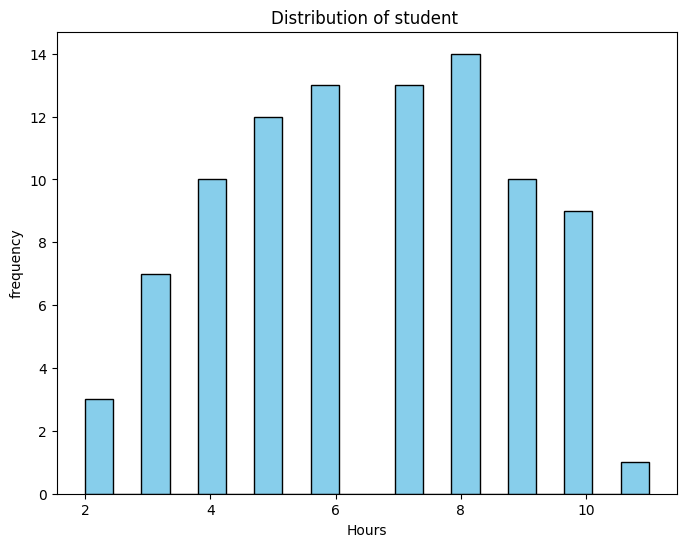

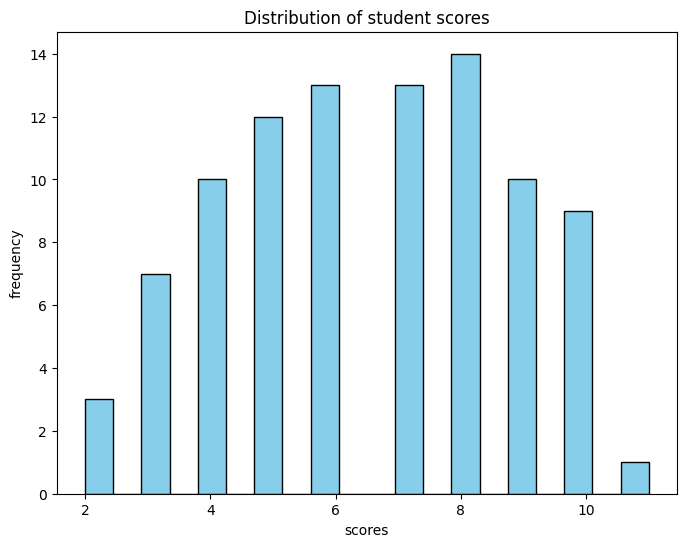

In [5]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.hist(x, bins=20,color='skyblue',edgecolor='black')
plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('Distribution of student ')
plt.show()

plt.figure(figsize=(8,6))
plt.hist(x, bins=20,color='skyblue',edgecolor='black')
plt.xlabel('scores')
plt.ylabel('frequency')
plt.title('Distribution of student scores')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test= train_test_split(
x,
y,
test_size=0.2,
random_state=42
)


In [7]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print("model coeeficient(slope):",model.coef_[0])
print("model intercept:",model.intercept_)


model coeeficient(slope): 6.804392044598464
model intercept: 24.617635980111494


In [8]:
y_pred =  model.predict(x_test)
#User predictions to test
user_input = pd. DataFrame ([[10]],columns=['hours'])
print(model.predict(user_input)) 

[92.66155643]


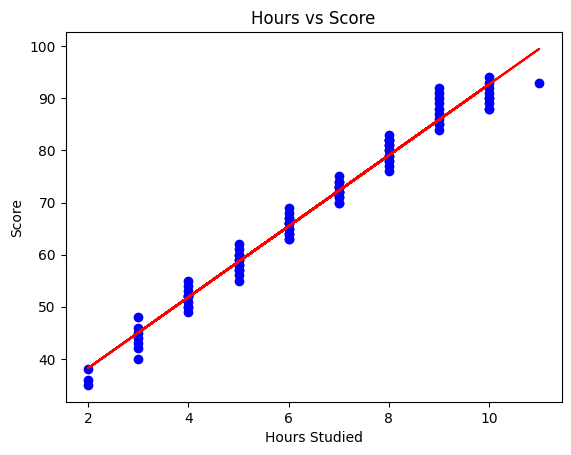

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title("Hours vs Score")
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

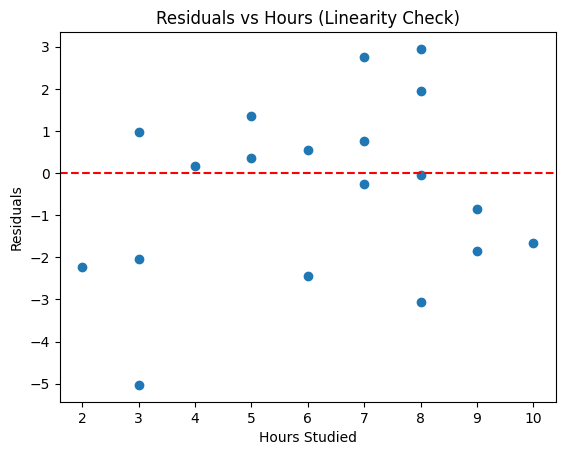

In [12]:
residuals=y_test-y_pred
plt.scatter(x_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Hours Studied")
plt.ylabel("Residuals")
plt.title("Residuals vs Hours (Linearity Check)")
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
print("MSE: (mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 : {r2:.3f}")


MSE: (mse:.2f}
RMSE: 2.06
R^2 : 0.984


In [25]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Data
#
x= np.array([[1], [2], [3], [4], [5]])
# Study Hours
y= np.array([12, 18, 25, 27, 35])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

gd_model=SGDRegressor(
learning_rate="constant",
eta0=0.1,
max_iter=1000,
    tol=1e-3,
    random_state=42
)

gd_model.fit(X_scaled, y)


y_pred = gd_model.predict(X_scaled)


print("Model Parameters:")
print("Slope (m):", gd_model.coef_[0])
print("Intercept (c):", gd_model.intercept_[0])

print("\nEvaluation Metrics:")
print("MSE:", mean_squared_error(y, y_pred))
print("MAE:", mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R^2:", r2_score(y, y_pred))


x_new = np.array([[6]])
x_new_scaled = scaler.transform(x_new)
print("\nPrediction for 6 study hours:", gd_model.predict(x_new_scaled)[0])

Model Parameters:
Slope (m): 7.8410451911974155
Intercept (c): 23.417468861833534

Evaluation Metrics:
MSE: 1.3442578732449164
MAE: 0.8987237371189473
RMSE: 1.1594213527639192
R^2: 0.9782623241713306

Prediction for 6 study hours: 40.05083754069112
